In [1]:
!gdown 1eXxq1vkhAm1MBascNXaW7nnuKj9UD_j5

Downloading...
From: https://drive.google.com/uc?id=1eXxq1vkhAm1MBascNXaW7nnuKj9UD_j5
To: /content/test_img.png
100% 481k/481k [00:00<00:00, 96.5MB/s]


In [2]:
from PIL import Image, ImageOps
import numpy as np

i = Image.open('test_img.png')
a = np.asarray(ImageOps.grayscale(i))
a = a/255
U, S, Vh = np.linalg.svd(a)
U.shape, S.shape, Vh.shape

((354, 354), (354,), (550, 550))

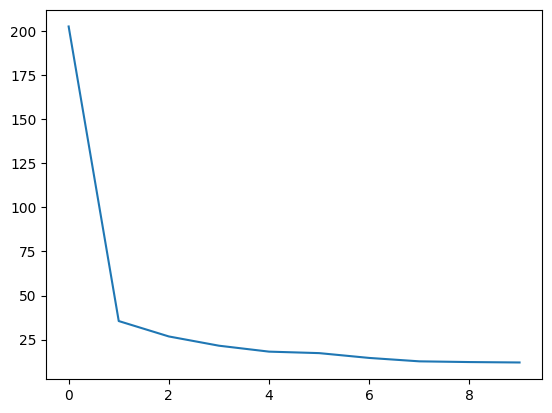

In [3]:
import matplotlib.pyplot as plt

plt.plot(S[:10])

In [8]:
num_mod = 5

(U * S)[:,:num_mod].shape,  Vh[:num_mod,:].shape, i.size

((354, 5), (5, 550), (550, 354))

Оригинал, 194700 параметров


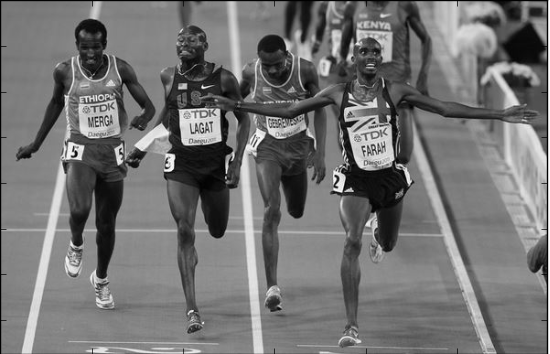

После SVD (3), 2712 параметров


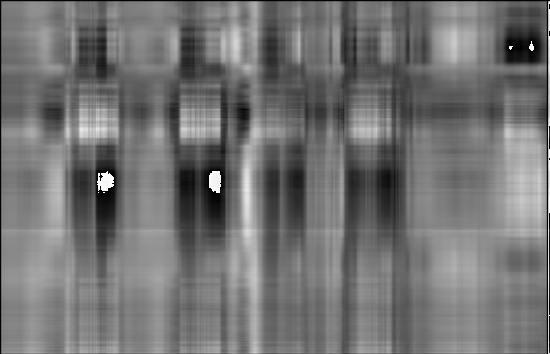

После SVD (8), 7232 параметров


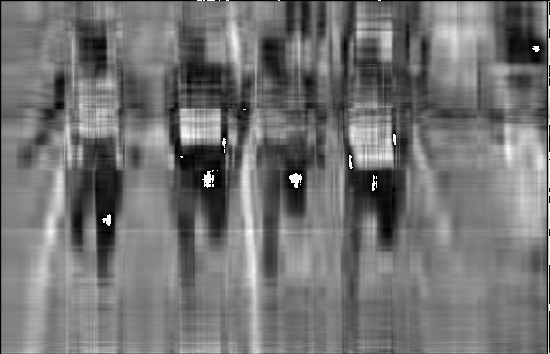

После SVD (20), 18080 параметров


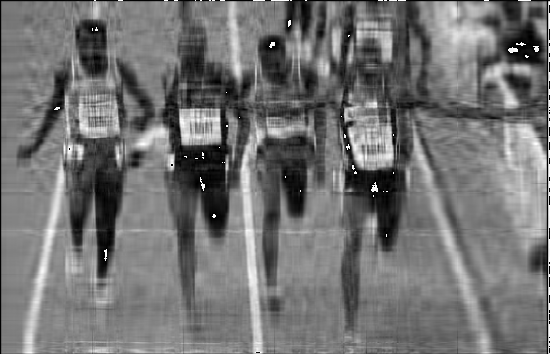

После SVD (50), 45200 параметров


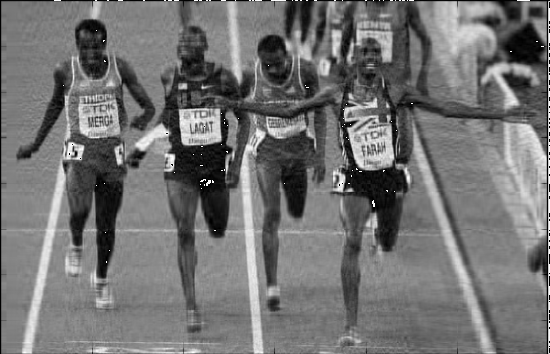

In [12]:
print(f"Оригинал, {i.size[0]*i.size[1]} параметров")
display(ImageOps.grayscale(i))
#nS = np.pad(S[:num_mod], (0, len(S)-num_mod), 'constant')
mods = [3,8,20,50]
for num_mod in mods:
  ra = np.dot((U * S)[:,:num_mod], Vh[:num_mod,:])
  print(f"После SVD ({num_mod}), {((U * S)[:,:num_mod]).size+(Vh[:num_mod,:]).size} параметров")
  display(Image.fromarray(np.uint8(ra*255)))